# Task 2 

# Hotel Booking Data Preprocessing & Feature Engineering

This notebook demonstrates a comprehensive workflow for preparing hotel booking data for analysis and machine learning. The steps include:

- **Data Loading & Inspection:** Importing the dataset and reviewing its structure to identify data types and missing values.
- **Data Cleaning:** Renaming columns for clarity and dropping irrelevant features.
- **Outlier Detection & Handling:** Visualizing and capping outliers in key numerical columns using the IQR method.
- **Feature Engineering:** Creating new features such as total nights stayed and transforming date columns.
- **Categorical Transformation:** Encoding categorical variables using one-hot encoding for model compatibility.
- **Target Encoding:** Converting the booking status into a binary format for predictive modeling.

By following these steps, the dataset is transformed into a clean, structured format suitable for further analysis and machine learning tasks.

### Step 1: Data Loading & Initial Inspection
Load the dataset and inspect its structure to understand the available features and data types. This helps identify missing values, data types, and potential issues early on.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns



# Load Data
df = pd.read_csv("first inten project.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

### Step 2: Data Description
Generate a statistical summary of the dataset to get an overview of the distribution, central tendency, and spread of each feature. This helps in identifying outliers and understanding feature ranges.

In [ ]:
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


### Step 3: Renaming Columns for Clarity
Rename columns to more descriptive names for better readability and easier reference throughout the analysis.

In [ ]:
# Step 3: Rename columns for clarity
df.rename(columns={
    "number of adults": "adults",
    "number of children": "children",
    "number of weekend nights": "weekend_nights",
    "number of week nights": "week_nights",
    "type of meal": "meal_type",
    "car parking space": "car_parking",
    "room type": "room_type",
    "lead time": "lead_time",
    "market segment type": "market_type",
    "repeated": "is_repeated",
    "P-C": "cancelled_times",
    "P-not-C": "not_cancelled_times",
    "average price": "avg_price",
    "special requests": "special_requests",
    "date of reservation": "reservation_date",
    "booking status": "booking_status"
}, inplace=True)

df.head()

,Booking_ID,adults,children,weekend_nights,week_nights,meal_type,car_parking,room_type,lead_time,market_type,is_repeated,cancelled_times,not_cancelled_times,avg_price,special_requests,reservation_date,booking_status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


### Step 4: Outlier Detection & Visualization
Visualize key numerical features using boxplots to detect outliers. Outliers can skew analysis and model performance, so identifying them is crucial for robust preprocessing.

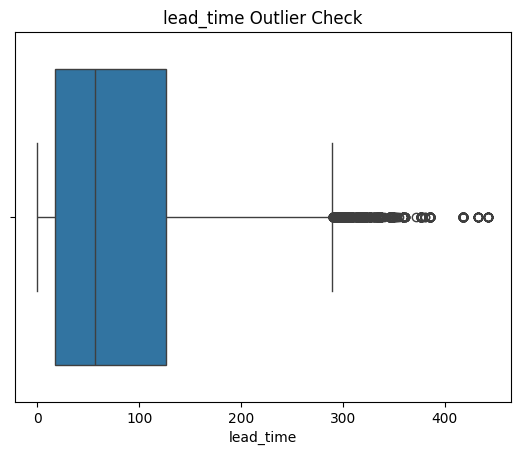

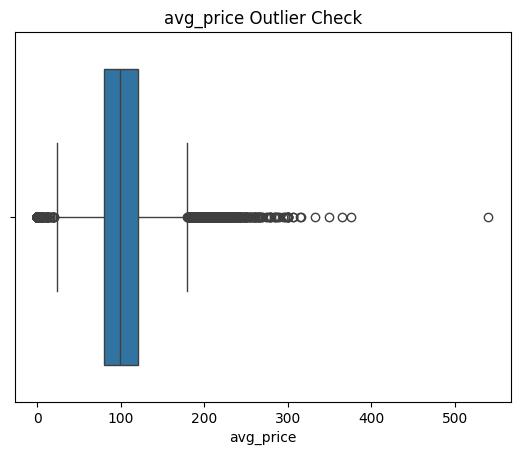

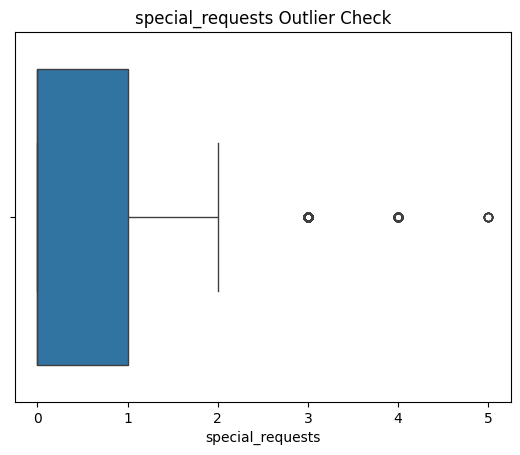

In [ ]:
#step 1: Show the Outliers

for col in ["lead_time", "avg_price", "special_requests"]:
    sns.boxplot(x=df[col])
    plt.title(f"{col} Outlier Check")
    plt.show()


### Step 5: Outlier Handling (IQR Capping)
Cap outliers in selected features using the Interquartile Range (IQR) method. This reduces the impact of extreme values and helps stabilize model training.

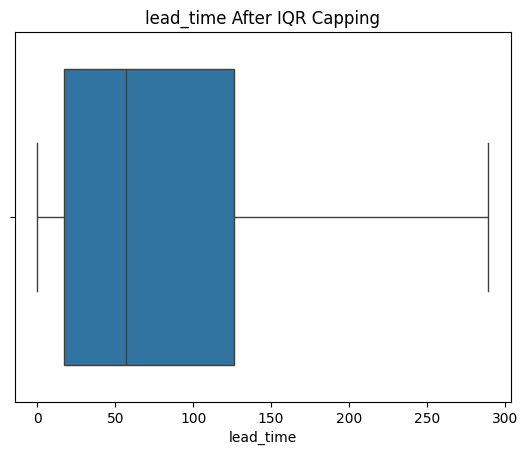

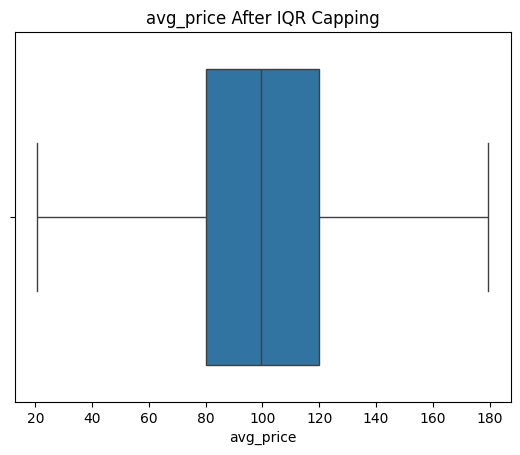

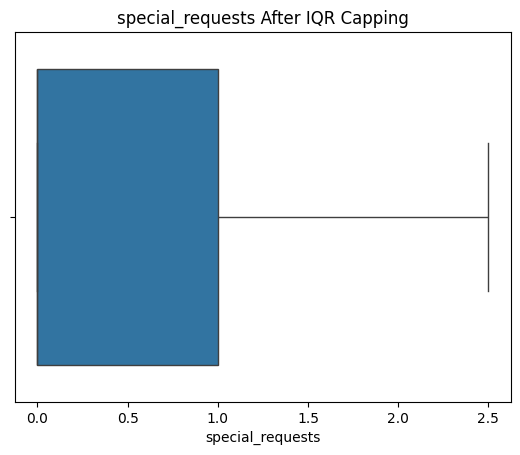

In [ ]:
#Step 2: Cap the outliers based on the IQR 

def cap_outliers_iqr(df, column): # fuction to cap the outlier
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[column] = df[column].apply(
        lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
    )

cap_outliers_iqr(df, "lead_time")
cap_outliers_iqr(df, "avg_price")
cap_outliers_iqr(df, "special_requests")

for col in ["lead_time", "avg_price", "special_requests"]:
    sns.boxplot(x=df[col])
    plt.title(f"{col} After IQR Capping")
    plt.show()

### Step 6: Feature Selection
Remove irrelevant or redundant columns to focus the analysis on meaningful features and reduce noise in the dataset.

In [ ]:
# Step 1: Drop unnecessary columns
df.drop(columns=["Booking_ID"], inplace=True)

df.head()

,adults,children,weekend_nights,week_nights,meal_type,car_parking,room_type,lead_time,market_type,is_repeated,cancelled_times,not_cancelled_times,avg_price,special_requests,reservation_date,booking_status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224.0,Offline,0,0,0,88.00,0.0,10/2/2015,Not_Canceled
1,1,0,1,3,Not Selected,0,Room_Type 1,5.0,Online,0,0,0,106.68,1.0,11/6/2018,Not_Canceled
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1.0,Online,0,0,0,50.00,0.0,2/28/2018,Canceled
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211.0,Online,0,0,0,100.00,1.0,5/20/2017,Canceled
4,1,0,1,2,Not Selected,0,Room_Type 1,48.0,Online,0,0,0,77.00,0.0,4/11/2018,Canceled


### Step 7: Date Transformation
Convert reservation dates to datetime format for easier manipulation and analysis of time-based patterns.

In [ ]:
# Step 2: Convert reservation_date to datetime
df["reservation_date"]= pd.to_datetime(df["reservation_date"], errors='coerce')
df.head()

,adults,children,weekend_nights,week_nights,meal_type,car_parking,room_type,lead_time,market_type,is_repeated,cancelled_times,not_cancelled_times,avg_price,special_requests,reservation_date,booking_status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224.0,Offline,0,0,0,88.00,0.0,2015-10-02,Not_Canceled
1,1,0,1,3,Not Selected,0,Room_Type 1,5.0,Online,0,0,0,106.68,1.0,2018-11-06,Not_Canceled
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1.0,Online,0,0,0,50.00,0.0,2018-02-28,Canceled
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211.0,Online,0,0,0,100.00,1.0,2017-05-20,Canceled
4,1,0,1,2,Not Selected,0,Room_Type 1,48.0,Online,0,0,0,77.00,0.0,2018-04-11,Canceled


### Step 8: Feature Engineering (Total Nights)
Create a new feature representing the total number of nights stayed by combining week and weekend nights. This can help capture the overall duration of stay.

In [ ]:
# Extract total_nights
df["total_nights"] = df["week_nights"] + df["weekend_nights"]
df.head()

,adults,children,weekend_nights,week_nights,meal_type,car_parking,room_type,lead_time,market_type,is_repeated,cancelled_times,not_cancelled_times,avg_price,special_requests,reservation_date,booking_status,total_nights
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224.0,Offline,0,0,0,88.00,0.0,2015-10-02,0,7
1,1,0,1,3,Not Selected,0,Room_Type 1,5.0,Online,0,0,0,106.68,1.0,2018-11-06,0,4
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1.0,Online,0,0,0,50.00,0.0,2018-02-28,1,4
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211.0,Online,0,0,0,100.00,1.0,2017-05-20,1,2
4,1,0,1,2,Not Selected,0,Room_Type 1,48.0,Online,0,0,0,77.00,0.0,2018-04-11,1,3


### Step 9: Target Encoding
Transform the target variable (booking status) into a binary format to prepare it for machine learning models.

In [ ]:
# Encode the target column (booking status: 1 = Canceled, 0 = Not Canceled)
df["booking_status"] = df["booking_status"].map({"Canceled": 1, "Not_Canceled": 0})
df.head()

,adults,children,weekend_nights,week_nights,meal_type,car_parking,room_type,lead_time,market_type,is_repeated,cancelled_times,not_cancelled_times,avg_price,special_requests,reservation_date,booking_status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224.0,Offline,0,0,0,88.00,0.0,2015-10-02,0
1,1,0,1,3,Not Selected,0,Room_Type 1,5.0,Online,0,0,0,106.68,1.0,2018-11-06,0
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1.0,Online,0,0,0,50.00,0.0,2018-02-28,1
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211.0,Online,0,0,0,100.00,1.0,2017-05-20,1
4,1,0,1,2,Not Selected,0,Room_Type 1,48.0,Online,0,0,0,77.00,0.0,2018-04-11,1


### Step 10: Categorical Feature Transformation (One-Hot Encoding)
Convert categorical variables into numerical format using one-hot encoding. This allows machine learning models to interpret categorical data effectively.

In [112]:
# Encode Categorical Columns (One-Hot Encoding)
# Encode 'meal_type', 'room_type', and 'market_type'
df_encoded = pd.get_dummies(df, columns=["meal_type", "room_type", "market_type"])


df_encoded.columns[-10:]  # Just to show a preview of new columns

Index(['room_type_Room_Type 3', 'room_type_Room_Type 4',
       'room_type_Room_Type 5', 'room_type_Room_Type 6',
       'room_type_Room_Type 7', 'market_type_Aviation',
       'market_type_Complementary', 'market_type_Corporate',
       'market_type_Offline', 'market_type_Online'],
      dtype='object')

In [ ]:
df_encoded.head()

,adults,children,weekend_nights,week_nights,car_parking,lead_time,is_repeated,cancelled_times,not_cancelled_times,avg_price,...,room_type_Room_Type 3,room_type_Room_Type 4,room_type_Room_Type 5,room_type_Room_Type 6,room_type_Room_Type 7,market_type_Aviation,market_type_Complementary,market_type_Corporate,market_type_Offline,market_type_Online
0,1,1,2,5,0,224.0,0,0,0,88.00,...,False,False,False,False,False,False,False,False,True,False
1,1,0,1,3,0,5.0,0,0,0,106.68,...,False,False,False,False,False,False,False,False,False,True
2,2,1,1,3,0,1.0,0,0,0,50.00,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,2,0,211.0,0,0,0,100.00,...,False,False,False,False,False,False,False,False,False,True
4,1,0,1,2,0,48.0,0,0,0,77.00,...,False,False,False,False,False,False,False,False,False,True
